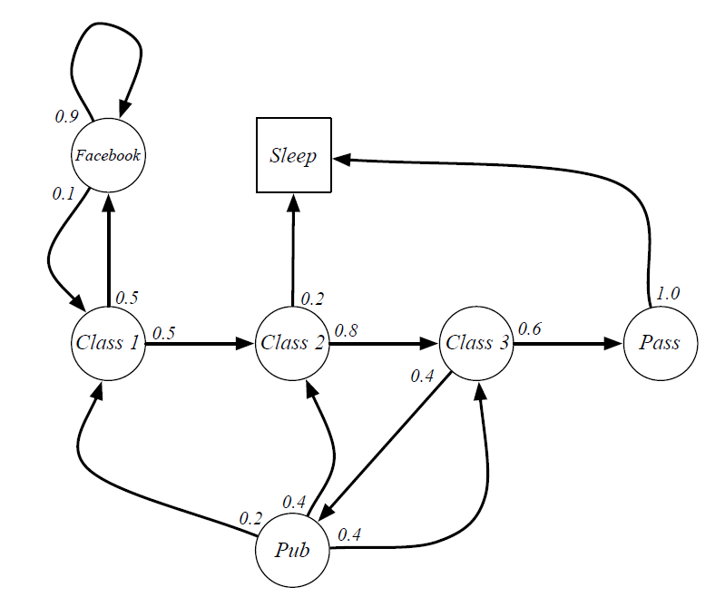

In [4]:
# Markov Chain
import numpy as np
P = [[0, 0.5, 0, 0, 0, 0.5, 0],
    [0, 0, 0.8, 0, 0, 0, 0.2],
    [0, 0, 0, 0.6, 0.4, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0.2, 0.4, 0.4, 0, 0, 0, 0],
    [0.1, 0, 0, 0, 0, 0.9, 0],
    [0, 0, 0, 0, 0, 0, 1]]

# sequential processes
# sequence generated by Markov chain
# [C1 C2 C3 Pass Pub FB Sleep] = [0 1 2 3 4 5 6]

name = ['C1','C2','C3','Pass','Pub','FB','Sleep']

# starting from 0
x = 0 
S = []
S.append(x)

for i in range(5):
    x = np.random.choice(len(P),1,p = P[x][:])[0]    
    S.append(x)
    
print(S)    

[0, 1, 2, 3, 6, 6]


In [5]:
episode = []

for i in S:
    episode.append(name[i])

print(episode)    

['C1', 'C2', 'C3', 'Pass', 'Sleep', 'Sleep']


In [6]:
# state probability distribution

P = [[0, 0, 1],
    [1/2, 1/2, 0],
    [1/3, 2/3, 0]]

u = [0, 1, 0]

P = np.asmatrix(P)
u = np.asmatrix(u)

for i in range(10):
    u = u*P
    print(u) 

[[0.5 0.5 0. ]]
[[0.25 0.25 0.5 ]]
[[0.29166667 0.45833333 0.25      ]]
[[0.3125     0.39583333 0.29166667]]
[[0.29513889 0.39236111 0.3125    ]]
[[0.30034722 0.40451389 0.29513889]]
[[0.30063657 0.3990162  0.30034722]]
[[0.29962384 0.39973958 0.30063657]]
[[0.30008198 0.40029417 0.29962384]]
[[0.3000217  0.39989632 0.30008198]]


In [7]:
u = [0, 1, 0]
u = u*P**10
print(u)

[[0.3000217  0.39989632 0.30008198]]


In [8]:
# Stationary Distribution
# eigenvalue = 1 and associated eigenvector

d, v = np.linalg.eig(P.T)

print(d) # loof for eigenvalue = 1

[-0.25+0.32274861j -0.25-0.32274861j  1.  +0.j        ]


In [9]:
print(v[:,2]/np.sum(v[:,2]))

[[0.3-0.j]
 [0.4-0.j]
 [0.3-0.j]]


In [10]:
# Markov Reward Process
# [C1 C2 C3 Pass Pub FB Sleep] = [0 1 2 3 4 5 6]

R = [-2, -2, -2, 10, 1, -1, 0]
gamma = 0.9

# if a sequence is given
S = [0, 1, 2, 4, 2, 4]

G = 0
for i in range(5):
    G = G + (gamma**i)*R[S[i]]
    
print(G)    

-6.0032


In [11]:
R = [-2, -2, -2, 10, 1, -1, 0]
gamma = 0.9

P = [[0, 0.5, 0, 0, 0, 0.5, 0],
    [0, 0, 0.8, 0, 0, 0, 0.2],
    [0, 0, 0, 0.6, 0.4, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0.2, 0.4, 0.4, 0, 0, 0, 0],
    [0.1, 0, 0, 0, 0, 0.9, 0],
    [0, 0, 0, 0, 0, 0, 1]]

# sequence generated by Markov chain
# [C1 C2 C3 Pass Pub FB Sleep] = [0 1 2 3 4 5 6]

# starting from 0
x = 0 
S = []
S.append(x)

for i in range(5):
    x = np.random.choice(len(P),1,p = P[x][:])[0]    
    S.append(x)

G = 0
for i in range(5):
    G = G + (gamma**i)*R[S[i]]

print(S)      
print(G)    

[0, 5, 5, 5, 5, 5]
-5.0951


In [12]:
# Bellman Equation in Matrix Form
# [C1 C2 C3 Pass Pub FB Sleep] = [0 1 2 3 4 5 6]

P = [[0, 0.5, 0, 0, 0, 0.5, 0],
    [0, 0, 0.8, 0, 0, 0, 0.2],
    [0, 0, 0, 0.6, 0.4, 0, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0.2, 0.4, 0.4, 0, 0, 0, 0],
    [0.1, 0, 0, 0, 0, 0.9, 0],
    [0, 0, 0, 0, 0, 0, 1]]

R = [-2, -2, -2, 10, 1, -1, 0]

P = np.asmatrix(P)
R = np.asmatrix(R)
R = R.T

gamma = 0.9
v = (np.eye(7) - gamma*P).I*R
print(v)

[[-5.01272891]
 [ 0.9426553 ]
 [ 4.08702125]
 [10.        ]
 [ 1.90839235]
 [-7.63760843]
 [ 0.        ]]


In [13]:
gamma = 0.9

v = np.zeros([7,1])

for i in range(100):
    v = R + gamma*P*v

print(v)

[[-5.01272786]
 [ 0.94265541]
 [ 4.08702138]
 [10.        ]
 [ 1.90839268]
 [-7.63760653]
 [ 0.        ]]


In [14]:
gamma = 1

v = np.zeros([7,1])

for i in range(100):
    v = R + gamma*P*v

print(v)

[[-12.4182877 ]
 [  1.47030894]
 [  4.33713371]
 [ 10.        ]
 [  0.84103688]
 [-22.31800952]
 [  0.        ]]


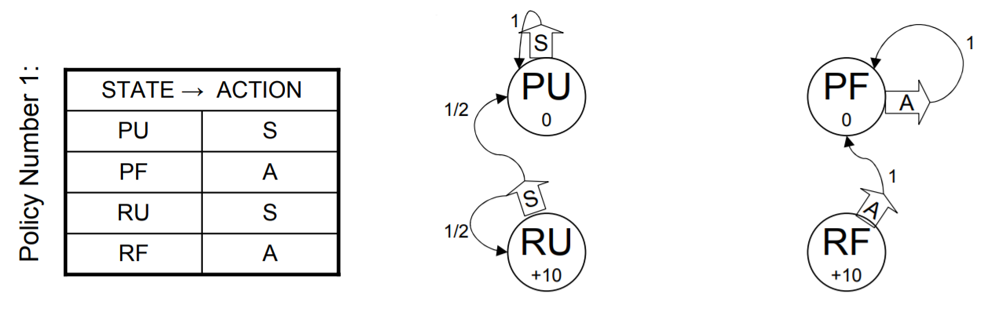

In [15]:
# Markov Decision Process
# [PU PF RU RF] = [0 1 2 3]

import numpy as np

P = [[1, 0, 0, 0],
    [0, 1, 0, 0],
    [0.5, 0, 0.5, 0],
    [0, 1, 0, 0]]

R = [0, 0, 10, 10]

P = np.asmatrix(P)
R = np.asmatrix(R)
R = R.T

gamma = 0.9
v = (np.eye(4) - gamma*P).I*R
print(v)

[[1.05415115e-15]
 [0.00000000e+00]
 [1.81818182e+01]
 [1.00000000e+01]]


In [16]:
v = np.zeros([4,1])

for i in range(100):
    v = R + gamma*P*v

print(v)

[[ 0.        ]
 [ 0.        ]
 [18.18181818]
 [10.        ]]


In [18]:
# [PU PF RU RF] = [0 1 2 3]

import numpy as np

P = [[0.5, 0.5, 0, 0],
    [0, 1, 0, 0],
    [0.5, 0.5, 0, 0],
    [0, 1, 0, 0]]

R = [0, 0, 10, 10]

P = np.asmatrix(P)
R = np.asmatrix(R)
R = R.T

gamma = 0.9
v = (np.eye(4) - gamma*P).I*R
print(v)

[[ 0.]
 [ 0.]
 [10.]
 [10.]]


In [19]:
v = np.zeros([4,1])

for i in range(100):
    v = R + gamma*P*v

print(v)

[[ 0.]
 [ 0.]
 [10.]
 [10.]]


In [20]:
P = {
 0: {0: [(1, 0)], 1: [(0.5, 0), (0.5, 1)]},
 1: {0: [(0.5, 0), (0.5, 3)], 1: [(1, 1)]},
 2: {0: [(0.5, 0), (0.5, 2)], 1: [(0.5, 0), (0.5, 1)]},
 3: {0: [(0.5, 2), (0.5, 3)], 1: [(1, 1)]},
}

R = [0, 0, 10, 10]
gamma = 0.9

States = [0, 1, 2, 3]
Actions = [0, 1]

v = [0]*4

In [21]:
# compute the above summation

v = [0, 0, 10, 10]

temp = 0
for trans in P[2][0]:
    temp = temp + trans[0]*v[trans[1]]
    
print(temp)

5.0


In [22]:
# shorten

sum(trans[0]*v[trans[1]] for trans in P[2][0])

5.0

In [23]:
v = [0]*4

In [24]:
# optimal value fuction

for i in range(100):
    for s in States:
        q_0 = sum(trans[0]*v[trans[1]] for trans in P[s][0])
        q_1 = sum(trans[0]*v[trans[1]] for trans in P[s][1])

        v[s] = R[s] + gamma*max(q_0, q_1)
    
print(v)

[31.58508953413495, 38.60400287377479, 44.02416232966445, 54.20158563176306]


In [25]:
# optimal policy

# once v computed

optPolicy = [0]*4

for s in States:
    q_0 = sum(trans[0]*v[trans[1]] for trans in P[s][0])
    q_1 = sum(trans[0]*v[trans[1]] for trans in P[s][1])   
    
    optPolicy[s] = np.argmax([q_0, q_1])

print(optPolicy) 

[1, 0, 0, 0]


In [26]:
# shorten

v = [0]*4

In [27]:
for i in range(100):
    for s in States:
        v[s] = R[s] + gamma*max([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])    
    
print(v)

[31.58508953413495, 38.60400287377479, 44.02416232966445, 54.20158563176306]


In [28]:
optPolicy = [0]*4

for s in States:       
    optPolicy[s] = np.argmax([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])

print(optPolicy) 

[1, 0, 0, 0]


Exercise (Gridworld Domain)

Simple grid world with a goal state with reward and a “bad state” with reward -100

Actions move in the desired direction with probably 0.8, in one of the perpendicular directions with

Taking an action that would bump into a wall leaves agent where it is

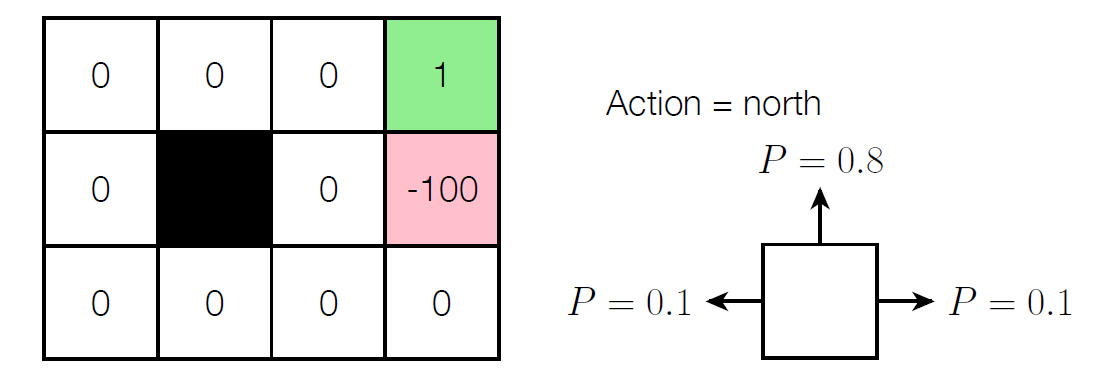

In [29]:
P = {
 0: {0: [(0.9,0),(0.1,1),(0,4)], 1: [(0.8,1),(0.1,4),(0.1,0)], 2: [(0.8,4),(0.1,1),(0.1,0)], 3: [(0.9,0),(0.1,4)]},
 1: {0: [(0.8,1),(0.1,2),(0.1,0)], 1: [(0.8,2),(0.2,1)], 2: [(0.8,1),(0.1,0),(0.1,2)], 3: [(0.8,0),(0.2,1)]},
 2: {0: [(0.8,2),(0.1,3),(0.1,1)], 1: [(0.8,3),(0.1,5),(0.1,2)], 2: [(0.8,5),(0.1,1),(0.1,3)], 3: [(0.8,1),(0.1,2),(0.1,5)]},
 3: {0: [(0.9,3),(0.1,2)], 1: [(0.9,3),(0.1,6)], 2: [(0.8,6),(0.1,2),(0.1,3)], 3: [(0.8,2),(0.1,3),(0.1,6)]},
 4: {0: [(0.8,0),(0.2,4)], 1: [(0.8,4),(0.1,7),(0.1,0)], 2: [(0.8,7),(0.2,4)], 3: [(0.8,4),(0.1,0),(0.1,7)]},
 5: {0: [(0.8,2),(0.1,6),(0.1,5)], 1: [(0.8,6),(0.1,9),(0.1,2)], 2: [(0.8,9),(0.1,5),(0.1,6)], 3: [(0.8,5),(0.1,2),(0.1,9)]},
 6: {0: [(0.8,3),(0.1,6),(0.1,5)], 1: [(0.8,6),(0.1,10),(0.1,3)], 2: [(0.8,10),(0.1,5),(0.1,6)], 3: [(0.8,5),(0.1,3),(0.1,10)]},
 7: {0: [(0.8,4),(0.1,8),(0.1,7)], 1: [(0.8,8),(0.1,7),(0.1,4)], 2: [(0.9,7),(0.1,8)], 3: [(0.9,7),(0.1,4)]},
 8: {0: [(0.8,8),(0.1,9),(0.1,7)], 1: [(0.8,9),(0.2,8)], 2: [(0.8,8),(0.1,7),(0.1,9)], 3: [(0.8,7),(0.2,8)]},
 9: {0: [(0.8,5),(0.1,10),(0.1,8)], 1: [(0.8,9),(0.1,9),(0.1,5)], 2: [(0.8,9),(0.1,8),(0.1,10)], 3: [(0.8,8),(0.1,5),(0.1,9)]},
 10: {0: [(0.8,6),(0.1,10),(0.1,9)], 1: [(0.9,10),(0.1,6)], 2: [(0.9,10),(0.1,9)], 3: [(0.8,9),(0.1,6),(0.1,10)]}
}

R = [0, 0, 0, 1, 0, 0, -100, 0, 0, 0, 0]
gamma = 0.9

States = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Actions = [0, 1, 2, 3] # [north, east, south, west]

v = [0]*11

In [30]:
# optimal value fuction

for i in range(100):
    for s in States:
        q_0 = sum(trans[0]*v[trans[1]] for trans in P[s][0])
        q_1 = sum(trans[0]*v[trans[1]] for trans in P[s][1])
        q_2 = sum(trans[0]*v[trans[1]] for trans in P[s][2])
        q_3 = sum(trans[0]*v[trans[1]] for trans in P[s][3])

        v[s] = R[s] + gamma*max(q_0, q_1, q_2, q_3)
    
print(v)

[5.46991289990088, 6.313016781079707, 7.189835364530538, 8.668832766371658, 4.8028486314273, 3.346646443535637, -96.67286272722137, 4.161433444369266, 3.6539401768050603, 3.2220160316109103, 1.526193402980731]


In [31]:
# optimal policy

# once v computed

optPolicy = [0]*11

for s in States:       
    optPolicy[s] = np.argmax([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])

print(optPolicy)  

[1, 1, 1, 0, 0, 3, 3, 0, 3, 3, 2]


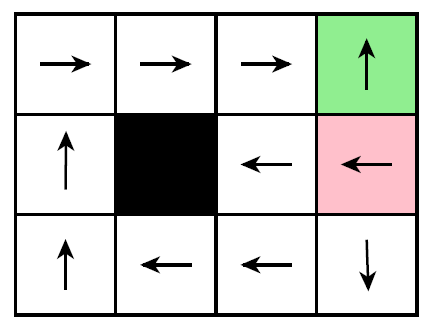

Example.

This environment with a goal state with reward 1, a warning state with reward -1 and a danger state with reward -2

There are two actions 'walk' and 'jump'

Find a optimal policy

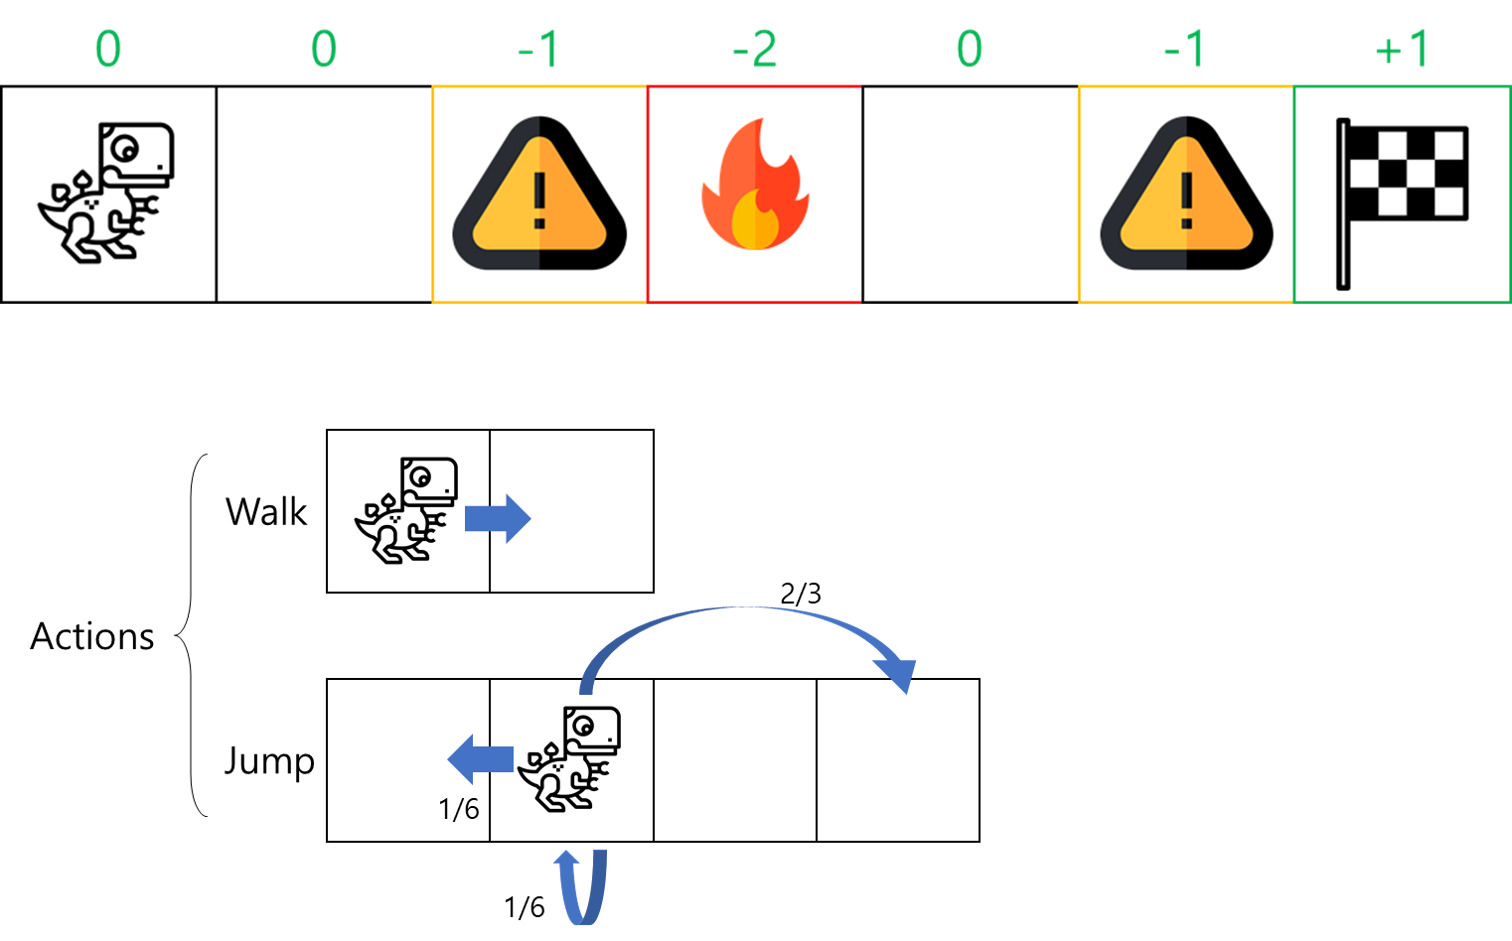

In [32]:
P = {
    0: {0: [(1,1)],
        1: [(1/3,0),(2/3,2)]},
    1: {0: [(1,2)],
        1: [(1/6,0),(1/6,1),(2/3,3)]},
    2: {0: [(1,3)],
        1: [(1/6,1),(1/6,2),(2/3,4)]},
    3: {0: [(1,4)],
        1: [(1/6,2),(1/6,3),(2/3,5)]},
    4: {0: [(1,5)],
        1: [(1/6,3),(1/6,4),(2/3,6)]},
    5: {0: [(1,6)],
        1: [(1/6,4),(1/6,5),(2/3,6)]},
    6: {0: [(1,6)],
        1: [(1/6,5),(5/6,6)]},
}

R = [0, 0, -1, -2, 0, -1, 1]

gamma = 0.6 

States = [0,1,2,3,4,5,6]
Actions = [0,1] # W or J

In [33]:
v = [0]*7

for i in range(100):
    for s in States:
        v[s] = R[s] + gamma*max([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])  
    
print(v)

[-0.26530612244897966, -0.4421768707482995, -0.7369614512471658, -1.4285714285714288, 0.9523809523809519, 0.49999999999999933, 2.499999999999999]


In [34]:
# optimal policy

optPolicy = [0]*7

for s in States:       
    optPolicy[s] = np.argmax([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])

print(optPolicy)    

[0, 0, 1, 0, 1, 0, 0]


In [35]:
# 마지막 state에서 돌지 않게
P = {
    0: {0: [(1,1)],
        1: [(1/3,0),(2/3,2)]},
    1: {0: [(1,2)],
        1: [(1/6,0),(1/6,1),(2/3,3)]},
    2: {0: [(1,3)],
        1: [(1/6,1),(1/6,2),(2/3,4)]},
    3: {0: [(1,4)],
        1: [(1/6,2),(1/6,3),(2/3,5)]},
    4: {0: [(1,5)],
        1: [(1/6,3),(1/6,4),(2/3,6)]},
    5: {0: [(1,6)],
        1: [(1/6,4),(1/6,5),(2/3,6)]},
    6: {0: [(1,7)],
        1: [(1,7)]},
    7: {0: [(1,7)],
        1: [(1,7)]},
}

R = [0, 0, -1, -2, 0, -1, 1, 0]

gamma = 0.6 

States = [0,1,2,3,4,5,6,7]
Actions = [0,1] 

In [36]:
v = [0]*8

for i in range(100):
    for s in States:
        v[s] = R[s] + gamma*max([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])  
    
print(v)

[-0.38775510204081626, -0.6462585034013605, -1.0770975056689343, -1.8571428571428572, 0.23809523809523803, -0.4, 1.0, 0.0]


In [37]:
# optimal policy

optPolicy = [0]*8

for s in States:       
    optPolicy[s] = np.argmax([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])

print(optPolicy)    

[0, 0, 1, 0, 1, 0, 0, 0]


Example.

Find a optimal policy

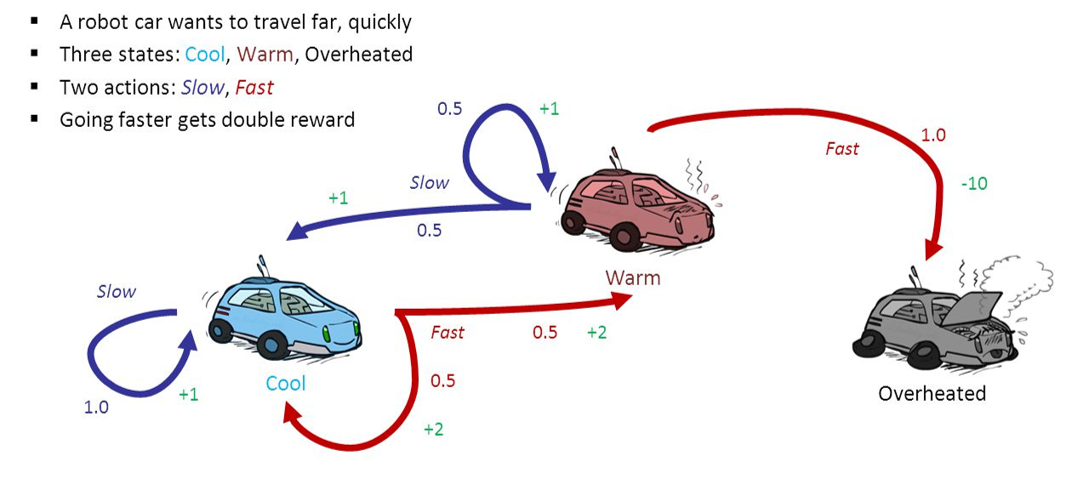

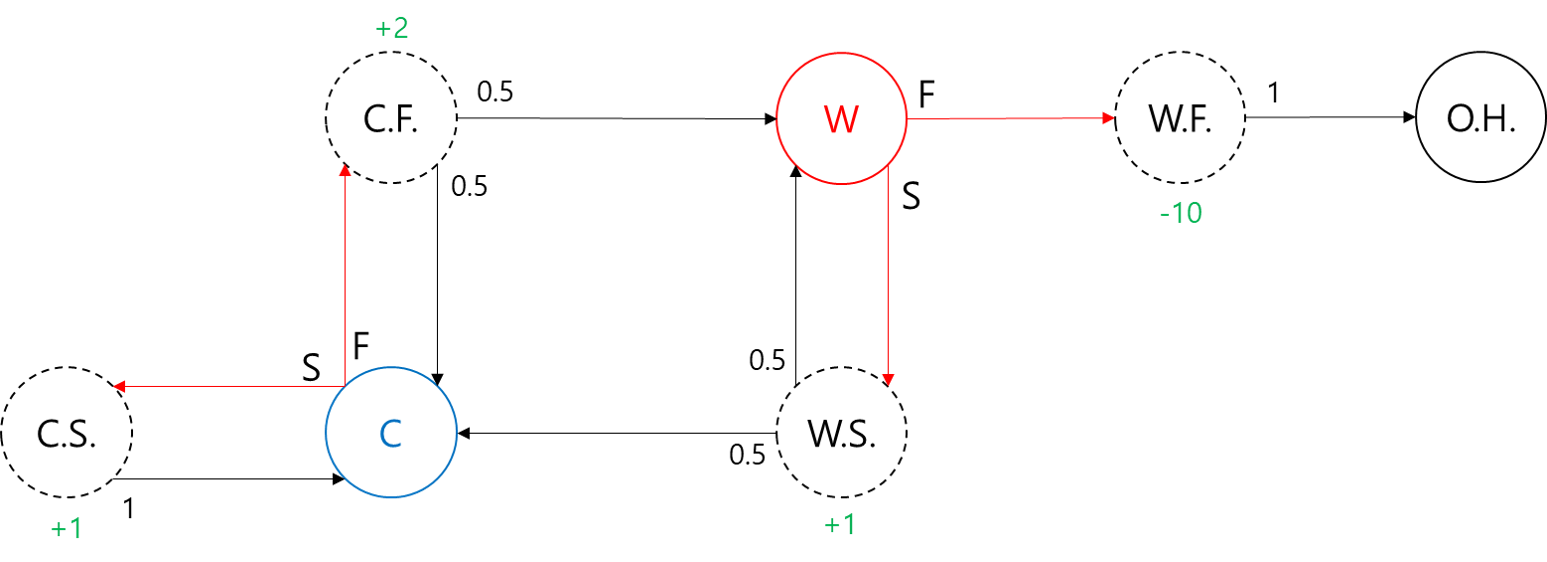

In [38]:
P = {
    0: {0: [(1/2,1), (1/2,5)],
        1: [(1/2,1), (1/2,5)]},
    1: {0: [(1,2)],
        1: [(1,6)]},
    2: {0: [(1,3)],
        1: [(1,3)]},
    3: {0: [(1,3)],
        1: [(1,3)]},
    4: {0: [(1,5)],
        1: [(1,5)]},
    5: {0: [(1,0)],
        1: [(1,4)]},
    6: {0: [(1/2,1), (1/2,5)],
        1: [(1/2,1), (1/2,5)]}
}

R = [2, 0, -10, 0, 1, 0, 1]

gamma = 0.9

States = [0, 1, 2, 3, 4, 5, 6]
Actions = [0, 1] # Fast, Slow

In [39]:
v = [0]*7

for i in range(100):
    for s in States:
        v[s] = R[s] + gamma*max([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])  
    
print(v)

[8.394736836099968, 6.6552631524899715, -10.0, 0.0, 7.799736836099968, 7.555263152489971, 7.394736837240974]


In [40]:
# optimal policy

optPolicy = [0]*7

for s in States:       
    optPolicy[s] = np.argmax([sum([trans[0]*v[trans[1]] for trans in P[s][a]]) for a in Actions])

print(optPolicy)   

[0, 1, 0, 0, 0, 0, 0]
